# 타이타닉 생존자 예측 
 - PassengerId : 승객 id
 - Survived : 생존 유무 0=사망, 1=생존
 - Pclass : 객실 클래스 1=상위, 2=중간, 3=하위
 - Name : 승객 이름
 - Age : 나이
 - Sex : 성별 - male=남성, female=여성
 - SibSp :
 - Parch :
 - Ticket : 티켓 번호
 - Fare : 표 가격
 - Cabin : 선실 번호(방 이름)
 - Embarked : 탑승 구역 C = Cherbourg, Q = Queenstown, S = Southampton

##
라이브러리 호출

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#표준화 라이브러리
from sklearn.preprocessing import MinMaxScaler


## 
타이타닉 데이터셋 호출

In [87]:
train_data = pd.read_csv('train.csv')
print(train_data.head())
print()
print(train_data.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

(

In [88]:
test_data = pd.read_csv('test.csv')
print(test_data.head())
print()
print(test_data.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

(418, 11)


##
# 1. EDA 
 - 탐색적 데이터 분석 : 실질적인 데이터분석을 하기 전 데이터의 유형을 이해 하고자 하는 단계 데이터를 시각화 하여 특징들을 살펴보자

Sex,female,male
Survived,233,109
Dead,81,468


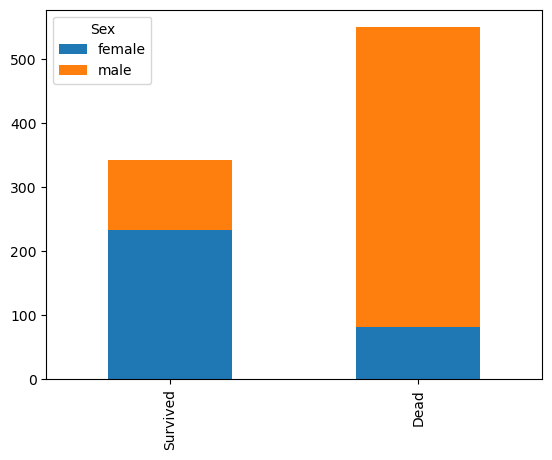

In [89]:
# Sex(성별) : 남성, 여성 별 생존률 시각화
def bar_chart(feature):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True , subplots=False, )
    return df

def rate_Survived(Survived) :
    women = train_data[train_data['Sex']=='female'][Survived]
    rate_women = sum(women) / len(women)
    men = train_data[train_data['Sex'] == 'male'][Survived]
    rate_men = sum(men) / len(men)
    print('여성의 생존률 : {0:.2f}%, 남성의 생존률 : {1:.2f}%'.format(rate_women * 100, rate_men *100))
    
bar_chart('Sex')

- 여성에 경우 70% 이상의 생존률
- 남성에 경우 20% 미만의 생존률

Pclass_1의 생존률 0.63%, Pclass_2의 생존률 0.47%, Pclass_3의 생존률 0.24%


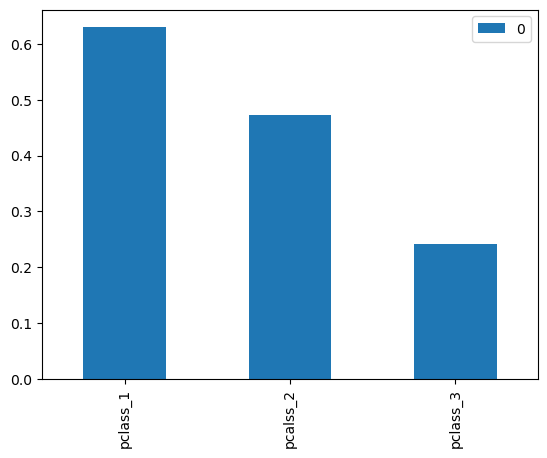

In [90]:
# 객실 등급별 생존확률 시각화

pclass = train_data['Pclass'].value_counts()
pclass_Survived = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()
pclass_Dead = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()
# 객실 등급별 생존확률
pclass_1 = pclass_Survived.iloc[0] / pclass.iloc[1]
pclass_2 = pclass_Survived.iloc[2] / pclass.iloc[2]
pclass_3 = pclass_Survived.iloc[1] / pclass.iloc[0]
df = pd.DataFrame([pclass_1, pclass_2, pclass_3])
df.index = ['pclass_1', 'pcalss_2', 'pclass_3']
df.plot(kind='bar')


print('Pclass_1의 생존률 {0:.2f}%, Pclass_2의 생존률 {1:.2f}%, Pclass_3의 생존률 {2:.2f}%'.format(pclass_1, pclass_2, pclass_3))

 - 귀무가설 : 객실에 등급이 높을수록 생존률이 높을 것이다.
 - 대립가설 : 생존률은 객실 등급에 상관이 없을 것이다.
 - 결론 : 귀무가설을 채택하고 대립가설을 기각한다.

 - 객실 등급별 생존확률
 - 가장 많이 생존한 객실 등급은 p1 -> p2 -> p3 인것을 확인 할수 있다.
 - 데이터를 시각화 하여 분석 후 결과는 등급이 높을수록 생존률이 높은 것을 알수있다.

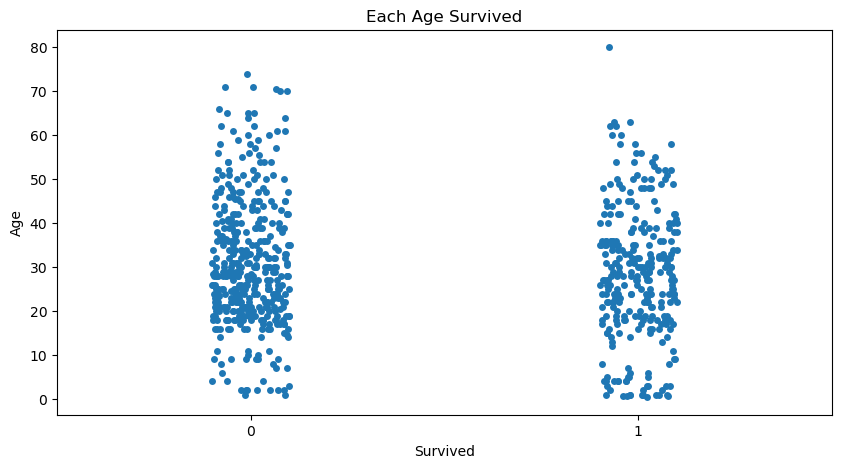

In [91]:
# 나이별 생존여부
plt.figure(figsize=(10, 5))
plt.title('Each Age Survived')
sns.stripplot(x='Survived', y='Age', data=train_data, jitter=True)
plt.show()

##
# 2. 데이터 전처리
 - 정재 : 결측값, 이상값 들을 삭제 및 알고리즘을 통해 대치 하는 것
 - 변수 선택 법 : 차원축소, 변수선택, 파생변수 생성, 불필요 변수 삭제 등
 - 전처리를 하는 이유? : 데이터들 정재하지 않을 경우 ML 예측률이 저하되기 때문 

In [96]:
# 데이터 정보 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - 이상값, 결측값을 확인 후 대치 방법을 선택하여 대치
 - age, cabin, embarked의 결측값이 있는 것으로 판단됨
 - age 대치 : age는 평균 나이 값으로 대치를 할 예정
 - cabin 대치 : cabin은 생존률 예측에는 불필요한 feature로 판단 단순삭제 진행
 - embarked 대치 : embarked 또한 생존률 예측에는 불필요한 feature로 판단 단순삭제 진행

##
결측값 확인 및 정재

In [97]:
print("학습용 데이터 null 값: \n", train_data.isnull().sum())
print()
print("데스트용 데이터 null 값 :\n", test_data.isnull().sum())

학습용 데이터 null 값: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데스트용 데이터 null 값 :
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


 - train 데이터 null = Age : 177건, Cabin : 687건, Embarked : 2건
 - test 데이터 null = Age : 86건, Cabin : 327건 Fare : 1건

In [99]:
# train_data 전처리

# 나이는 평균 나이(23세)로 대치
Age_avg = train_data['Age'].sum() / len(train_data.Age)
Age_avg.astype(int)
train_data['Age'] = train_data['Age'].fillna(23)

# test_data 전처리
Age_avg_test = test_data['Age'].sum() / len(test_data.Age) # 24세
test_data['Age'] = test_data['Age'].fillna(24)
test_data['Fare'].sum() / len(test_data['Fare']) #35.54
test_data['Fare'] = test_data['Fare'].fillna(35.54)

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

 - train_data 및 test_data 의 Age 및 Fare 널 값을 평균 값으로 대치 나머지 널 값은 사용하지 않음

In [216]:
# replace 메서드를 사용하여 남성은 0, 여성을 1로 변환
train_data['Sex'] = train_data['Sex'].replace({'male' : 0, 'female' : 1})
test_data['Sex'] = test_data['Sex'].replace({'male' : 0, 'female' : 1})

# 모델 예측에 필요한 features만 바인딩
# X : 학습용 features 바인딩 (Pcalss, Sex, Age, Fare)
# y : target인 Survived 바인딩
X_train = train_data.loc[: ,['Pclass', 'Sex', 'Age', 'Fare']]
y_train = train_data['Survived']

# 모델 예측에 필요한 features만 바인
X_test = test_data.loc[:, ['Pclass', 'Sex', 'Age', 'Fare']]

In [232]:
# 학습용 데이터 와 테스트 데이터 features들의 평균 값 확인
print('#### 평균 ####')
print('학습용 데이터의 평균 : \n', X_train.mean())
print()
print('테스트용 데이터의 평균 : \n', X_test.mean())

#학습용 데이터 와 테스트 데이터 features들의 분산 값 확인
print('#### 분산 ####')
print('학습용 데이터의 분산 : \n', X_train.var())
print()
print('테스트용 데이터의 분산 : \n', X_test.var())

#### 평균 ####
학습용 데이터의 평균 : 
 Pclass     2.308642
Sex        0.352413
Age       28.368316
Fare      32.204208
dtype: float64

테스트용 데이터의 평균 : 
 Pclass     2.265550
Sex        0.363636
Age       28.982057
Fare      35.626980
dtype: float64
#### 분산 ####
학습용 데이터의 분산 : 
 Pclass       0.699015
Sex          0.228475
Age        176.204589
Fare      2469.436846
dtype: float64

테스트용 데이터의 분산 : 
 Pclass       0.708690
Sex          0.231960
Age        166.076381
Fare      3118.161512
dtype: float64


## 데이터 표준화

 -  표준을 0, 분산을 1로 변환 시킴

In [234]:
# 학습 데이터 표준화 작업 fit and transform
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_train= pd.DataFrame(data=X_train_scaler, columns=['Pclass', 'Sex', 'Age', 'Fare'])

# 테스트 데이터 표준화 작업 transform만 적용
X_test_scaler = scaler.transform(X_test)
X_test = pd.DataFrame(data=X_test_scaler, columns=['Pclass', 'Sex', 'Age', 'Fare'])

##
# 모델 학습 및 검증

In [314]:
# 검증용 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=159)

def scoring_func(clf):
    scoring = 'accuracy'
    score = cross_val_score(clf, X_train, y_train, cv=kf, n_jobs=1, scoring=scoring)
    print('평균 정확도 :', round(np.mean(score)*100, 2), '%')

In [320]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

rmf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)
print('램덤포레스트'); scoring_func(rmf_clf)

dit_clf = DecisionTreeClassifier()
print('의사결정나무'); scoring_func(dit_clf)

lcr_reg = LogisticRegression()
print('로지스틱회귀'); scoring_func(lcr_reg)

램덤포레스트
평균 정확도 : 84.4 %
의사결정나무
평균 정확도 : 79.91 %
로지스틱회귀
평균 정확도 : 78.56 %


In [353]:
rmf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=159)
rmf_clf.fit(X_train, y_train)
prediction = rmf_clf.predict(X_test)
result = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : prediction})
result.to_csv('submission.csv', index=False)